In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [294]:
df = pd.read_csv("../soil.csv")
df.head(30)

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Remarks
0,Sylhet,Loamy,62,Agricultural,72,28.6,Wheat,Monsoon,2024-09-24,Requires attention
1,Dhaka,Sandy,63,Unused,118,23.8,Maize,Autumn,2024-01-31,Moderate potential
2,Rangpur,Peaty,51,Agricultural,106,32.0,Maize,Autumn,2024-03-11,Requires attention
3,Khulna,Sandy,67,Barren,336,31.6,Wheat,Autumn,2024-09-29,Low potential
4,Rangpur,Peaty,63,Agricultural,237,20.1,Rice,Winter,2024-04-01,Moderate potential
5,Rajshahi,Clay,58,Barren,345,29.3,Vegetables,Monsoon,2024-01-12,High potential
6,Rajshahi,Silt,68,Barren,324,33.8,Tea,Winter,2024-09-06,Low potential
7,Chattogram,Loamy,49,Agricultural,71,27.0,Jute,Summer,2024-08-05,Moderate potential
8,Barishal,Silt,64,Agricultural,157,22.1,Vegetables,Monsoon,2024-12-21,High potential
9,Dhaka,Sandy,61,Residential,301,27.9,Rice,Autumn,2024-03-01,Requires attention


In [295]:
df['Satellite_Observation_Date'] = pd.to_datetime(df['Satellite_Observation_Date'], errors='coerce')
df['Year'] = df['Satellite_Observation_Date'].dt.year
df['Month'] = df['Satellite_Observation_Date'].dt.month
df['Day'] = df['Satellite_Observation_Date'].dt.day

In [296]:
#Dropping unused columns
df = df.drop(['Remarks'], axis='columns')

In [297]:
categorical_columns = [ 'Land_Use_Type', 'Season', 'Crop_Suitability']
df['Soil_Type'] = df['Soil_Type'].replace(['Clay', 'Loamy', 'Peaty', 'Sandy', 'Silt'], [1, 2, 3, 4, 5])
df['Season'] = df['Season'].replace(['Summer', 'Autumn', 'Winter', 'Monsoon'], [1, 2, 3, 4])
df['Land_Use_Type'] = df['Land_Use_Type'].replace(['Barren', 'Residential', 'Unused', 'Agricultural'], [1, 2, 3, 4])
df['Crop_Suitability'] = df['Crop_Suitability'].replace({'Rice': 0, 'Tea': 1, 'Spices':2, 'Wheat':3, 'Jute':4, 'Vegetables':5, 'Maize':6})

/var/folders/tv/tm7xmb6555lftyx74scpw9r40000gq/T/ipykernel_80546/2234263003.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Soil_Type'] = df['Soil_Type'].replace(['Clay', 'Loamy', 'Peaty', 'Sandy', 'Silt'], [1, 2, 3, 4, 5])
/var/folders/tv/tm7xmb6555lftyx74scpw9r40000gq/T/ipykernel_80546/2234263003.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Season'] = df['Season'].replace(['Summer', 'Autumn', 'Winter', 'Monsoon'], [1, 2, 3, 4])
/var/folders/tv/tm7xmb6555lftyx74scpw9r40000gq/T/ipykernel_80546/2234263003.py:4: F

In [298]:
df.head(40)

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Year,Month,Day
0,Sylhet,2,62,4,72,28.6,3,4,2024-09-24,2024,9,24
1,Dhaka,4,63,3,118,23.8,6,2,2024-01-31,2024,1,31
2,Rangpur,3,51,4,106,32.0,6,2,2024-03-11,2024,3,11
3,Khulna,4,67,1,336,31.6,3,2,2024-09-29,2024,9,29
4,Rangpur,3,63,4,237,20.1,0,3,2024-04-01,2024,4,1
5,Rajshahi,1,58,1,345,29.3,5,4,2024-01-12,2024,1,12
6,Rajshahi,5,68,1,324,33.8,1,3,2024-09-06,2024,9,6
7,Chattogram,2,49,4,71,27.0,4,1,2024-08-05,2024,8,5
8,Barishal,5,64,4,157,22.1,5,4,2024-12-21,2024,12,21
9,Dhaka,4,61,2,301,27.9,0,2,2024-03-01,2024,3,1


In [299]:
df.describe()

,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Year,Month,Day
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000.0,2000.000000,2000.000000
mean,2.974500,70.10450,2.501000,223.136000,27.330250,3.019500,2.451500,2024-07-02 02:06:43.200000,2024.0,6.550000,15.231500
min,1.000000,40.00000,1.000000,50.000000,20.000000,0.000000,1.000000,2024-01-01 00:00:00,2024.0,1.000000,1.000000
25%,2.000000,54.00000,1.000000,137.000000,23.500000,1.000000,1.000000,2024-04-04 00:00:00,2024.0,4.000000,8.000000
50%,3.000000,70.00000,3.000000,222.500000,27.300000,3.000000,2.000000,2024-07-03 00:00:00,2024.0,7.000000,15.000000
75%,4.000000,86.00000,3.000000,308.000000,31.000000,5.000000,3.000000,2024-09-30 00:00:00,2024.0,9.000000,23.000000
max,5.000000,100.00000,4.000000,400.000000,35.000000,6.000000,4.000000,2024-12-31 00:00:00,2024.0,12.000000,31.000000
std,1.397436,17.97699,1.111583,100.548543,4.341251,2.025135,1.122621,NaN,0.0,3.412964,8.788488


In [283]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from sklearn.model_selection import cross_val_score

In [292]:
#Basic Random Forest Classifier

X = df[['Fertility_Index', 'Average_Rainfall(mm)', 'Temperature(°C)', 'Month', 'Soil_Type', 'Season']]
y = df['Crop_Suitability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42, max_depth=80, n_estimators=500, max_leaf_nodes=10, max_features='log2')
model.fit(X_train, y_train)

# Make predictions
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)
print(test_accuracy)
print(val_accuracy)

scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))



0.0875
0.1125
Cross-validation scores: [0.15625   0.15625   0.15625   0.1875    0.15625   0.1328125 0.1484375
 0.1875    0.1171875 0.1796875]
Average cross-validation score: 0.16
Standard deviation of cross-validation scores: 0.02


In [285]:
#SVM(Support Vector Machines)

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(gamma=0.1, C=0.0002)

svm.fit(X_train, y_train)
val_predictions=svm.predict(X_val)
test_predictions=svm.predict(X_test)

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(val_accuracy)
print(test_accuracy)

scores = cross_val_score(svm, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))

0.1125
0.16
Cross-validation scores: [0.1640625 0.1640625 0.1640625 0.15625   0.1640625 0.1640625 0.1640625
 0.1640625 0.1640625 0.1640625]
Average cross-validation score: 0.16
Standard deviation of cross-validation scores: 0.00


In [301]:
#
import gc
from tensorflow.keras.regularizers import l2

print(X_train.shape)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape =(6,)),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(7)
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


class garbage_collect_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    gc.collect()

history = model.fit(X_train, # Train examples
          y_train, # Train labels
          epochs=100, # number of epochs (passes through data during training)
          batch_size= 100, # number of points to consider in each optimizer iteration
          callbacks = [garbage_collect_callback()],
          validation_data=(X_val, y_val), #data to use for validation
          verbose=1) #will print information about optimization process

test_binary_pred = model.predict(X_test)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('\nTesting model on mock_test set:')
print(f'Model Loss: {scores[0]:.3f}, Model Accuracy: {scores[1]:.3f}')

(1280, 6)
Epoch 1/100
13/13 [==============================] - 1s 33ms/step - loss: 18.6312 - accuracy: 0.1312 - val_loss: 5.1339 - val_accuracy: 0.1469
Epoch 2/100
13/13 [==============================] - 0s 14ms/step - loss: 8.8117 - accuracy: 0.1344 - val_loss: 3.6657 - val_accuracy: 0.1344
Epoch 3/100
13/13 [==============================] - 0s 13ms/step - loss: 5.6723 - accuracy: 0.1484 - val_loss: 3.3180 - val_accuracy: 0.1625
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 4.1635 - accuracy: 0.1297 - val_loss: 3.1942 - val_accuracy: 0.1031
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 3.5859 - accuracy: 0.1469 - val_loss: 3.1296 - val_accuracy: 0.1375
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 3.3361 - accuracy: 0.1508 - val_loss: 3.0795 - val_accuracy: 0.1406
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 3.1762 - accuracy: 0.1484 - val_loss: 3.0362 - val_accuracy: 0.

In [426]:
df = pd.read_csv('../yield_df.csv')
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [427]:
df['Item'] = df['Item'].replace({'Cassava':0, 'Maize':1, 'Plantains and others':2, 'Potatoes':3, 'Rice, paddy':4, 'Sorghum':5, 'Soybeans':6, 'Sweet potatoes':7, 'Wheat':8, 'Yams':9})

/var/folders/tv/tm7xmb6555lftyx74scpw9r40000gq/T/ipykernel_80546/2323293384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Item'] = df['Item'].replace({'Cassava':0, 'Maize':1, 'Plantains and others':2, 'Potatoes':3, 'Rice, paddy':4, 'Sorghum':5, 'Soybeans':6, 'Sweet potatoes':7, 'Wheat':8, 'Yams':9})


In [428]:
df = df.drop(['Unnamed: 0'], axis='columns')
low_counts = df['Area'].value_counts()
to_drop = low_counts[low_counts<100].index.tolist()
df_drop = df[~df['Area'].isin(low_counts)]
df = df.reset_index(drop=True)

In [429]:
df.head(10)


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,1,1990,36613,1485.0,121.0,16.37
1,Albania,3,1990,66667,1485.0,121.0,16.37
2,Albania,4,1990,23333,1485.0,121.0,16.37
3,Albania,5,1990,12500,1485.0,121.0,16.37
4,Albania,6,1990,7000,1485.0,121.0,16.37
5,Albania,8,1990,30197,1485.0,121.0,16.37
6,Albania,1,1991,29068,1485.0,121.0,15.36
7,Albania,3,1991,77818,1485.0,121.0,15.36
8,Albania,4,1991,28538,1485.0,121.0,15.36
9,Albania,5,1991,6667,1485.0,121.0,15.36


In [430]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])
df.head(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37
5,0,8,1990,30197,1485.0,121.0,16.37
6,0,1,1991,29068,1485.0,121.0,15.36
7,0,3,1991,77818,1485.0,121.0,15.36
8,0,4,1991,28538,1485.0,121.0,15.36
9,0,5,1991,6667,1485.0,121.0,15.36


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Item'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'hg/ha_yield'}>,
        <Axes: title={'center': 'average_rain_fall_mm_per_year'}>,
        <Axes: title={'center': 'pesticides_tonnes'}>],
       [<Axes: title={'center': 'avg_temp'}>, <Axes: >, <Axes: >]],
      dtype=object)

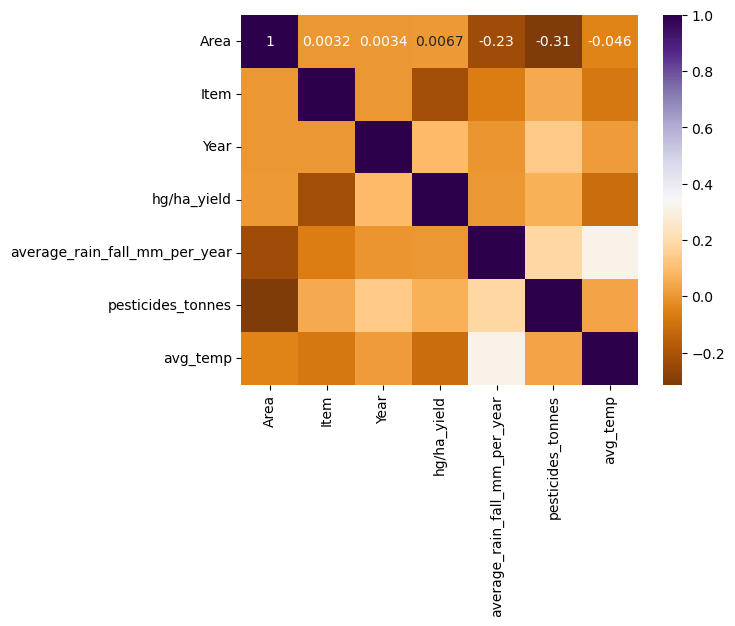

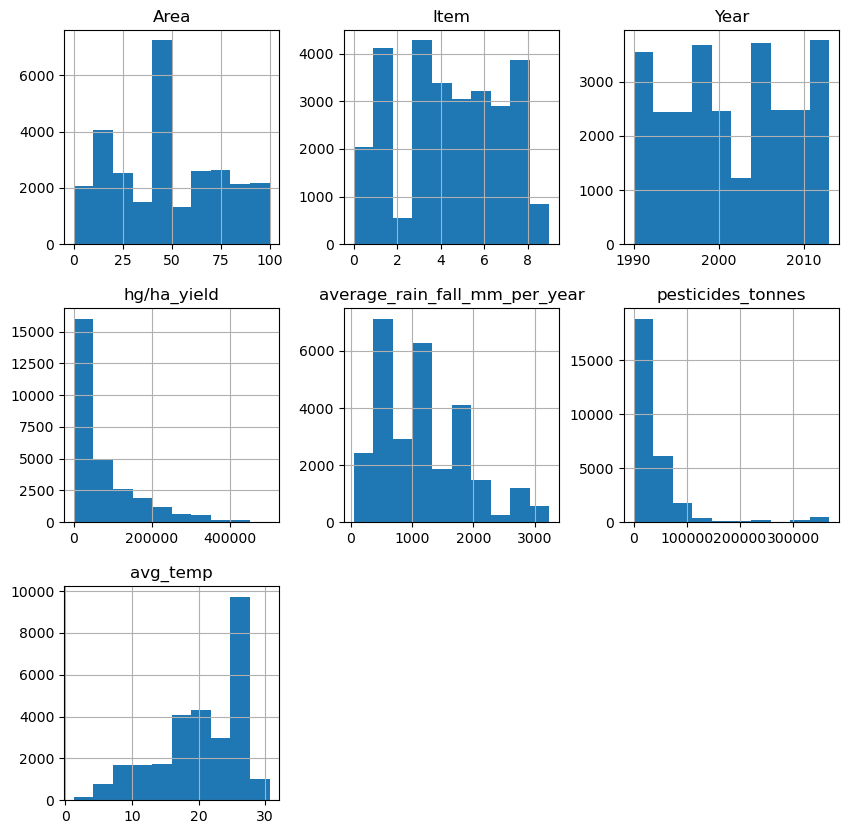

In [431]:
import seaborn as sns

sns.heatmap(df.corr(), annot= True , cmap='PuOr')

df.hist(figsize=(10,10))

In [432]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

X_train = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y_train = df[['hg/ha_yield']]



In [433]:
df.head(20)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37
5,0,8,1990,30197,1485.0,121.0,16.37
6,0,1,1991,29068,1485.0,121.0,15.36
7,0,3,1991,77818,1485.0,121.0,15.36
8,0,4,1991,28538,1485.0,121.0,15.36
9,0,5,1991,6667,1485.0,121.0,15.36


In [437]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42, n_estimators=500,  criterion='squared_error')
model.fit(X_train, y_train)

# Make predictions
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)
print(test_accuracy)
print(val_accuracy)

scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

The accuracy of the Linear Regression Model Train is 7.36
The accuracy of the  Linear Regression Model Test is 8.05


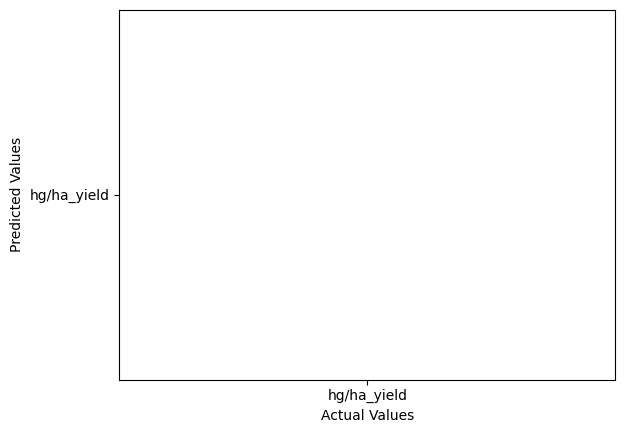

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The accuracy of the Random Forest Model Train is 99.61
The accuracy of the  Random Forest Model Test is 97.24


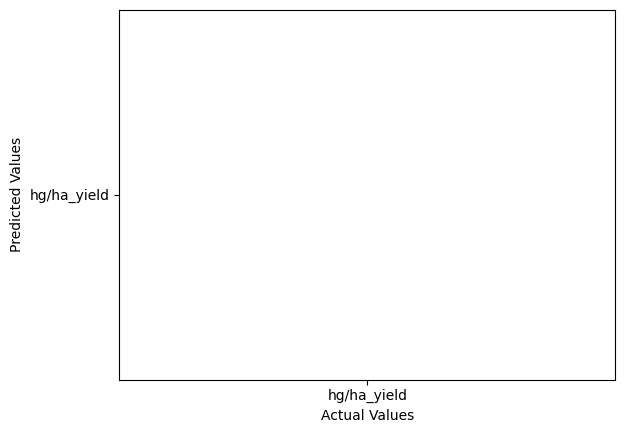

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


The accuracy of the Gradient Boost Model Train is 82.40
The accuracy of the  Gradient Boost Model Test is 82.51


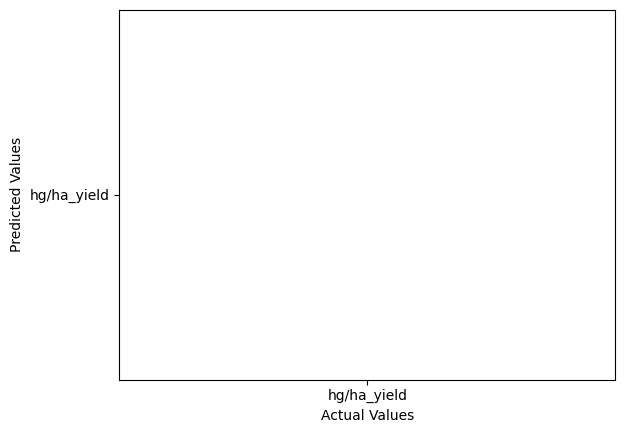

The accuracy of the XGBoost Model Train is 97.86
The accuracy of the  XGBoost Model Test is 96.37


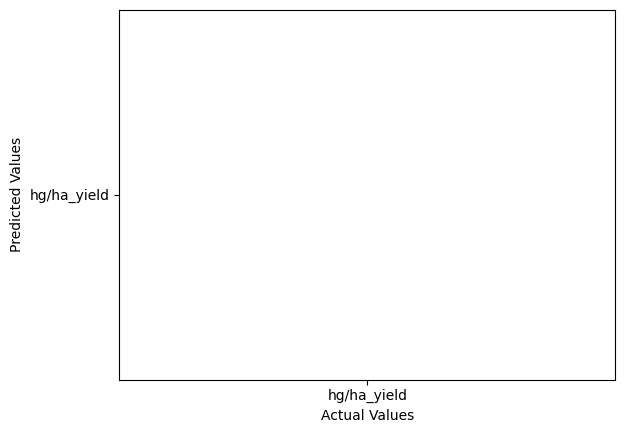

The accuracy of the KNN Model Train is 59.74
The accuracy of the  KNN Model Test is 37.06


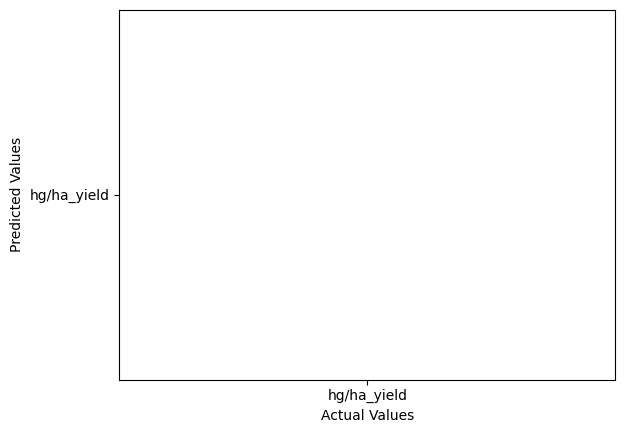

The accuracy of the Decision Tree Model Train is 99.97
The accuracy of the  Decision Tree Model Test is 95.25


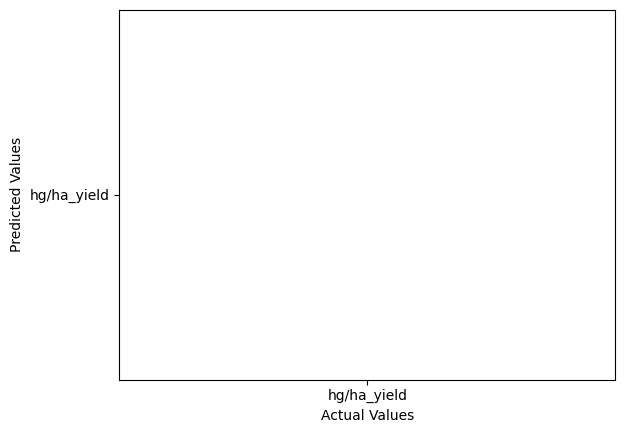

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


The accuracy of the Bagging Regressor Model Train is 99.61
The accuracy of the  Bagging Regressor Model Test is 97.23


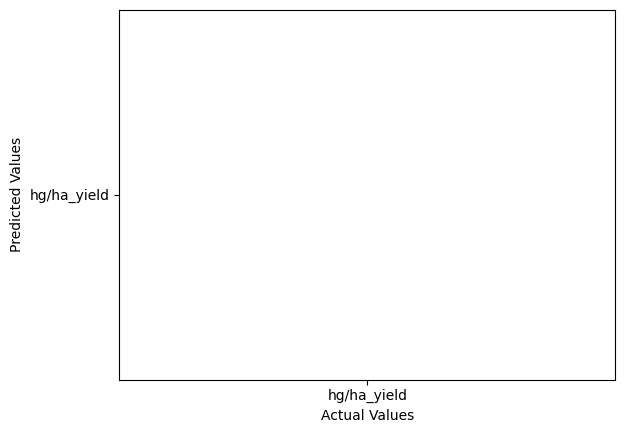

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.080462,6815754155.058181,0.080462
1,Random Forest,0.972389,204656558.575889,0.972389
2,Gradient Boost,0.825090,1296461365.832403,0.825090
3,XGBoost,0.963733,268813445.240303,0.963733
4,KNN,0.370585,4665319194.733332,0.370585
5,Decision Tree,0.952523,351907101.981562,0.952523
6,Bagging Regressor,0.972290,205389117.645898,0.972290


In [434]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()


dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)